# Лабораторная работа №2.2 "Изучение спектров атомов водорода и дейтерия"

<div style="padding-left:5%; padding-right:5%">Исследуются спектральные закономерности в оптических спектрах водорода и дейтерия. По результатам измерений вычисляются постоянные Ридберга для этих двух изотопов водорода, их потенциалы ионизации, изотопические сдвиги линий.</div>

## Спектральные линии водорода (серия Бальмера)

### Теоретическая справка

Для атома водорода существует точное решение уравнения Шредингера, поэтому его спектр является предметом тщательного экспериментального и теоретического исследования.

Длины волн спектральных линий водородоподобного атома описываются формулой:

$$
\dfrac{1}{\lambda_{mn}} = R Z^2 \left(\dfrac{1}{n^2} - \dfrac{1}{m^2} \right)
$$

где $R$ - константа, называемая постоянной Ридберга, а $m$ и $n$ - целые числа.

_Маленькая подсказка_: в лабнике дано значение для сравнения: $R = 109\, 667.6 \,\text{см}^{-1}$.

Мы будем исследовать **серию Бальмера**. Она соответствует $n = 2$ и $m$ от $n+1$ до $\infty$. Для 3, 4, 5, 6 линии обозначаются соответственно $H_\alpha, H_\beta, H_\gamma, H_\delta$

Строки таблицы:

*deg* - градусы угла

*min* - минуты угла

*sec* - секунды угла

*l*   - длина волны угла (для калибровочного графика)

### Обработка

#### Градуировка

In [1]:
import pandas as pd
import numpy as np

In [2]:
CALIBRATION_FILE = 'grad_neon.csv'
df_neon = pd.read_csv(CALIBRATION_FILE, delimiter=';', dtype=np.float)
df_neon.head()

,angle,"lambda, A"
0,2144.0,5852.0
1,2159.0,5882.0
2,2189.0,5945.0
3,2230.0,6030.0
4,2258.0,6096.0


In [30]:
class Calibrator():
    from scipy.stats import linregress
    
    def __init__(self, n=1):
        self.n = n
    
    def fit(self, x_data, y_data):
        import numpy as np
        p, resudials, rank, singular_values, cond_threshold = np.polyfit(x_data, y_data, self.n, full=True)
        self.f = np.poly1d(p)
        self.p = p
        self.err = resudials[0]
        return self
    
    def predict(self, x_data):
        return self.f(x_data)

In [31]:
x, y = df_neon['angle'].dropna(), df_neon['lambda, A'].dropna()
# Выкинем 0 элемент
x, y = x[:-1], y[:-1]

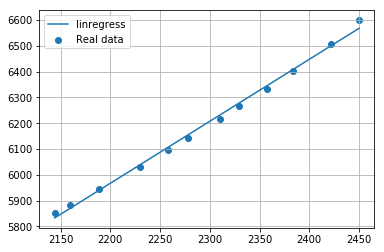

In [32]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

x_range = np.linspace(min(x), max(x), 1000)
calibrator = Calibrator().fit(x, y)
plt.scatter(x, y, label='Real data')
plt.plot(x_range, calibrator.predict(x_range), label=r'linregress')

plt.grid()
plt.legend()

#### Определение длин волн серии

In [33]:
BALMER_FILE = "balmer.csv"
balmer_df = pd.read_csv(BALMER_FILE, delimiter=';')
balmer_df.head()

,Цвет,angle,Имя
0,красная,2440,alpha
1,голубая,1446,beta
2,фиолетовый,804,gamma
3,слабо-фиолетовый,397,delta


In [34]:
balmer_lambda = list(calibrator.predict(balmer_df['angle']) / 10) # чтоб в нм

In [35]:
'Серия Бальмера дает: ' + ' нм; '.join([str(i) for i in balmer_lambda])

'Серия Бальмера дает: 654.3622343046013 нм; 415.7197875332539 нм; 261.5865372040738 нм; 163.87277881781787'

Сходится только первая. Дело в том, что наш калибровочный график не захватывает остальные углы!

#### Калибровка по ртути

In [36]:
RTYT_CALIBRATION_FILE = 'grad_rtyt.csv'
df_rtyt = pd.read_csv(RTYT_CALIBRATION_FILE, delimiter=';')
df_rtyt.head()

,angle,"lambda, nm"
0,833.0,435.8
1,279.0,404.7
2,1498.0,491.6
3,1921.0,546.1
4,2101.0,577.0


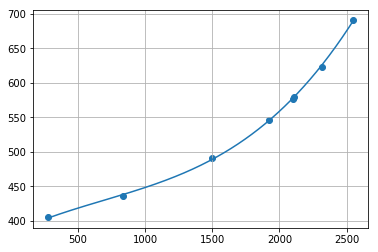

In [37]:
x, y = df_rtyt['angle'].dropna(), df_rtyt['lambda, nm'].dropna()

# Отсортируем данные
x, y = np.sort(x), np.sort(y)

x_range = np.linspace(min(x), max(x), 1000)
calibrator_rtyt = Calibrator(3)
calibrator_rtyt.fit(x, y)
plt.scatter(x, y)
plt.plot(x_range, calibrator_rtyt.predict(x_range))

plt.grid()

#### Объединим калибровки

In [38]:
df_calib = pd.concat([df_rtyt, df_neon]).fillna(0)
df_calib['lambda, nm'] += df_calib['lambda, A']/10
df_calib = df_calib[['angle', 'lambda, nm']]
df_calib = df_calib[df_calib['angle'] != 0]

/Users/aleksei/.virtualenvs/math/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [39]:
df_calib.head()

,angle,"lambda, nm"
0,833.0,435.8
1,279.0,404.7
2,1498.0,491.6
3,1921.0,546.1
4,2101.0,577.0


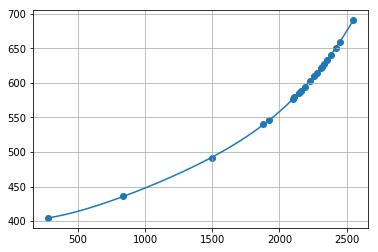

In [40]:
x, y = df_calib['angle'], df_calib['lambda, nm']

plt.scatter(x, y)

x_range = np.linspace(min(x), max(x), 1000)
calibrator_both = Calibrator(4)
calibrator_both.fit(x, y)
plt.plot(x_range, calibrator_both.predict(x_range), label=r'Approx.')

plt.grid()

Отлично! Теперь у нас есть калибровочный график. По нему можно сразу подсчитать длины волн серии Бальмера:

In [41]:
exper_balmer_lambda = calibrator_both.predict(balmer_df['angle'])
for i in zip(balmer_df['angle'], exper_balmer_lambda):
    print("Для угла {0:.0f} длина волны {1:.2f} нм".format(*i))

Для угла 2440 длина волны 656.76 нм
Для угла 1446 длина волны 487.30 нм
Для угла 804 длина волны 433.42 нм
Для угла 397 длина волны 409.30 нм


Истинные значения длин волн для серии Бальмера можно взять из <a href="https://ru.wikipedia.org/wiki/Серия_Бальмера" target="_blank">Википедии</a>

In [42]:
real_balmer_lambda = [656.3, 486.1, 434.1, 410.2]

In [43]:
for i, l in enumerate(exper_balmer_lambda):
    print('Относительная погрешность для волны {0:.3f} составляет {1:.3f}%'.
          format(l, abs(l - real_balmer_lambda[i])/l*100))

Относительная погрешность для волны 656.765 составляет 0.071%
Относительная погрешность для волны 487.297 составляет 0.246%
Относительная погрешность для волны 433.416 составляет 0.158%
Относительная погрешность для волны 409.297 составляет 0.221%


Мы получили хорошие результаты! На основании их можно проверить формулу в начале описания и найти постоянную Ридберга.

Сделаем так: построим график $\dfrac{1}{\lambda} = R \left(\dfrac{1}{2^2} - \dfrac{1}{n^2} \right)$

In [44]:
x, y = 1/np.array(range(3, 7))**2, 1/exper_balmer_lambda

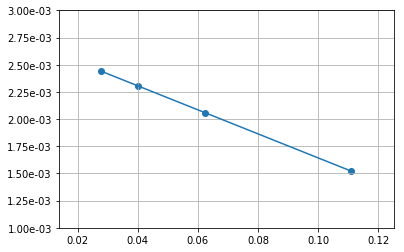

In [45]:
import matplotlib.ticker as mtick

f = np.poly1d(np.polyfit(x, y, 1))
x_range = np.linspace(min(x), max(x), 1000)

fig, ax = plt.subplots()
ax.scatter(x, y, label='raw data')
ax.plot(x_range, f(x_range), label='Linregress')
ax.set_ylim((0.001, 0.003))
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
#plt.

plt.grid()

Из графика имеем постоянную Ридберга (в см$^{-1}$):

In [46]:
R = -linregress(x, y)[0]*10**9 / 100

In [47]:
R

110464.39600699574

In [48]:
real_R = 109737.3157

Относительная погрешность:

In [49]:
(R - real_R) / R * 100

0.6582033064750444

*Не через МНК*. Усредним по каждой из линий:

In [50]:
def get_R(l, n):
    return 1/l / (1/2**2 - 1/n**2)

In [58]:
R_array = []
for i, elem in enumerate(exper_balmer_lambda):
    R_array.append(get_R(elem, i+3)*10**9/100)
    print('  Для n = {0} имеем R = {1:.2f}'.format(i+3, R_array[-1]))

  Для n = 3 имеем R = 109628.29
  Для n = 4 имеем R = 109447.30
  Для n = 5 имеем R = 109869.26
  Для n = 6 имеем R = 109944.53


In [63]:
R_best = np.mean(R_array)
print('  Отклонение экспериментальных данных: {0:.5f}'.format(np.std(R_array)/ R_best * 100))
print('  Ошибка МНК составила: {0:.5f}'.format(calibrator_both.err / 2000 * 100))

  Отклонение экспериментальных данных: 0.17967
  Ошибка МНК составила: 0.25590


In [53]:
R_best

109722.34795278775

In [79]:
(R_best - real_R) / R_best * 100

-0.013641475498407218

Результаты лучше через усреднения

## Изучения спектра йода

### Теоретическая справка

В первом приближении энергия молекулы может быть представлена в виде:
$$
E = E_\text{эл} + E_\text{колеб} + E_\text{вращ}
$$
При небольших $n$ имеем уравнение на энергию колебаний:
$$
E_\text{колеб} = \hbar \omega_0 \left( n + \dfrac{1}{2} \right)
$$
Энергия вращательных возбуждений:
$$
E_\text{вращ} = \dfrac{\hbar^2}{2 J} l (l+1),~ l = 0, 1, 2, \ldots
$$
Отношения частот (и энергий) всех состовляющих энергий:
$$
\omega_\text{эл} : \omega_\text{колеб} : \omega_\text{вращ} \approx 1 : \sqrt{\dfrac{m}{M}} : \dfrac{m}{M} \approx 1 : 10^{-3} : 10^{-6}
$$

Линии $h \nu_{1, 0}$ - самой длинноволновой из наблюдаемых линий поглощения ($n_{1, 0}$) - имеем:

In [80]:
IOD_FILENAME = 'iod.csv'
df_iod = pd.read_csv(IOD_FILENAME, delimiter=';')
df_iod.head()

,angle,Name
0,2304,"1,0"
1,2210,"1,5"
2,2210,grubo


In [82]:
iod_l = calibrator_both.predict(df_iod['angle'])

In [83]:
iod_l

array([620.51914016, 598.84007394, 598.84007394])

Определим энергию колебательного кванта возбужденного состояния молекулы йода:
$$
h \nu_2 = (h \nu_{1, 5} - h \nu_{1, 0}) / 5
$$

In [86]:
h = 6.626070040*10**(-34)
def lambda_to_nu(l):
    return 3*10**9/(l*10**(-9))
E_koleb = h*(lambda_to_nu(iod_l[1]) - lambda_to_nu(iod_l[0]))/5
E_koleb

2.3194328684273692e-20

In [87]:
def j_to_ev(joul):
    return joul/(1.6*10**(-19))

In [89]:
E_koleb_ev = j_to_ev(E_koleb)
E_koleb_ev

0.14496455427671057

Видно, что энергия колебательного кванта мала.